In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Upload dataset

In [6]:
data = pd.read_csv('data/full_who_dataset3.csv')

Draw a piechart with language distribution of tweets.

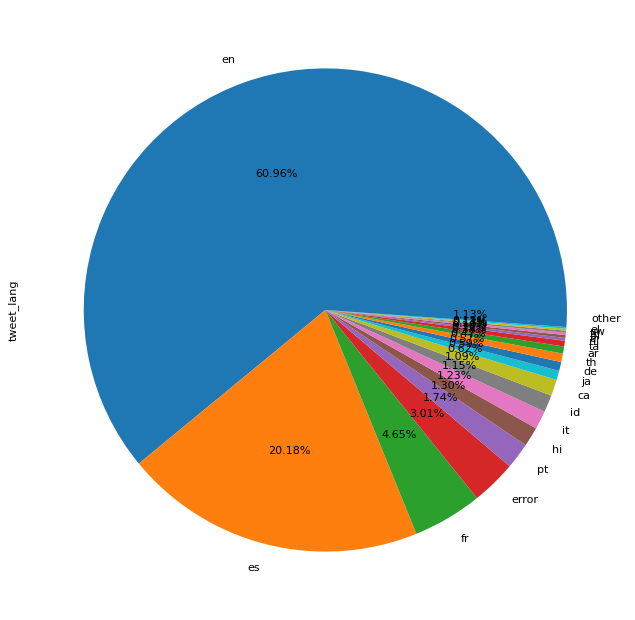

In [7]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

prob = data['tweet_lang'].value_counts(normalize=True)
threshold = 0.001
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='pie', autopct='%.2f%%', fontsize=10)
plt.xticks(rotation=0)
plt.show()